# Machine Learning

![alt text](https://pythonprogramming.net/static/images/svm/machineLearning.png)
### "Campo de estudo que dá aos computadores a habilidade de aprender sem serem explicitamente programados" - Arthur Samuel

## As categorias de ML
### Machine Learning não é uma técnica e sim um conjunto de técnicas <3

![alt text](https://i.pinimg.com/originals/f3/05/34/f3053485f518dd42bf0fc63bb5b23215.png)


- **Aprendizado supervisionado:** São apresentadas ao computador exemplos de entradas e saídas desejadas, fornecidas por um "professor". O objetivo é aprender uma regra geral que mapeia as entradas para as saídas.
- **Aprendizado não supervisionado:** Nenhum tipo de etiqueta é dado ao algoritmo de aprendizado, deixando-o sozinho para encontrar estrutura nas entradas fornecidas. O aprendizado não supervisionado pode ser um objetivo em si mesmo (descobrir novos padrões nos dados) ou um meio para atingir um fim.
- **Aprendizado por reforço:** Um programa de computador interage com um ambiente dinâmico, em que o programa deve desempenhar determinado objetivo (por exemplo, dirigir um veículo). É fornecido, ao programa, feedback quanto a premiações e punições, na medida em que é navegado o espaço do problema. Outro exemplo de aprendizado por reforço é aprender a jogar um determinado jogo apenas jogando contra um oponente.

# Existe um conjunto de passos que servem como guia 
![alt text](http://upxacademy.com/wp-content/uploads/2016/07/Steps-to-Predictive-Modelling.jpg)

# REGRESSÃO LOGÍSTICA

## Predição de valores baseada em uma série de correlações bi-dimensionais

É uma técnica estatística que tem como objectivo produzir, a partir de um conjunto de observações, um modelo que permita a predição de valores tomados por uma variável categórica, frequentemente binária, a partir de uma série de variáveis explicativas contínuas e/ou binárias

# Vamos tentar prever quem vai sobreviver?

<img src="https://media.giphy.com/media/tk39314j32wGk/giphy.gif" alt="Drawing" style="width: 700px;"/>

# Passo 1 - Capturando os dados

In [1]:
import pandas
titanic_raw = pandas.read_csv("titanic_fds_2_aula.csv")
titanic_raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Relatives,AgeRange,AgeNotNull,AgeFillNa-1,AgeFillNaMean,AgeFillNaSexMean,_Faixa_Etaria,Sobrenome,WomanName
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1,adulto,22.0,22.0,22.0,22.0,adulto,Braund,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1,adulto,38.0,38.0,38.0,38.0,adulto,Cumings,Florence Briggs Thayer
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0,adulto,26.0,26.0,26.0,26.0,adulto,Heikkinen,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1,adulto,35.0,35.0,35.0,35.0,adulto,Futrelle,Lily May Peel
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0,adulto,35.0,35.0,35.0,35.0,adulto,Allen,NaN


# Passo 2 - Preparação
### Devemos verificar se o nosso alvo é binário (isso é, 1 ou 0, True ou False)

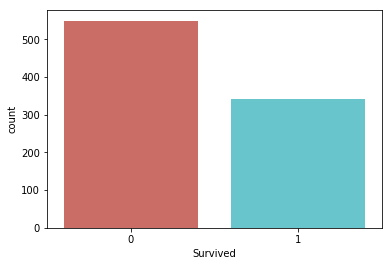

In [2]:
%matplotlib inline
import seaborn as sns

sns.countplot(x='Survived',data=titanic_raw, palette='hls')

## Passo 2.1 - Limpeza

#### Colunas que não fazem sentido para nossa predição devem ser removidas para nos ajudar a focar nas importantes

### Já que conhecemos o nosso dataset <3 

#### Vamos remover aquelas colunas que acreditamos não serem boas para os nossos modelos
- Survived - Essa é a nossa meta, então não podemos apagar!
- Pclass - A classe pode ter um efeito na sobrevivência? Será que tem botes só pra 1?
- Sex - Será que o sexo faz aumentar a sua chance? Botes só para mulheres?
- SibSp - O número de parentes, irmão e conjuges aumenta sua chance de sobreviver?
- Parch - O número de parentes, crianças ou pais aumenta sua chance de sobreviver?
- Fare - Será que quem pagou mais tem mais chance de sobreviver?
- Embarked - Será que aonde a pessoa embarcou interfere? Será que eles ficam mais pertos dos botes?
- relatives - Quantidade de parentes a bordo
- mae - É mãe?
- Age_fillna_mean - Será que os mais novos tem mais chance de sobreviver? 


<br>
### Vamos fazer um gráfico da correlação das colunas numéricas do titanic

In [3]:
titanic_raw.corr()

,PassengerId,Survived,Pclass,Age,Fare,Relatives,AgeNotNull,AgeFillNa-1,AgeFillNaMean,AgeFillNaSexMean
PassengerId,1.000000,-0.005007,-0.035144,0.036847,0.012658,-0.040143,0.036847,0.037997,0.033207,0.035543
Survived,-0.005007,1.000000,-0.338481,-0.077221,0.257307,0.016639,-0.077221,0.012439,-0.069809,-0.080453
Pclass,-0.035144,-0.338481,1.000000,-0.369226,-0.549500,0.065997,-0.369226,-0.359728,-0.331339,-0.330391
Age,0.036847,-0.077221,-0.369226,1.000000,0.096067,-0.301914,1.000000,1.000000,1.000000,1.000000
Fare,0.012658,0.257307,-0.549500,0.096067,1.000000,0.217138,0.096067,0.135707,0.091566,0.089079
Relatives,-0.040143,0.016639,0.065997,-0.301914,0.217138,1.000000,-0.301914,-0.147201,-0.248512,-0.253129
AgeNotNull,0.036847,-0.077221,-0.369226,1.000000,0.096067,-0.301914,1.000000,1.000000,1.000000,1.000000
AgeFillNa-1,0.037997,0.012439,-0.359728,1.000000,0.135707,-0.147201,1.000000,1.000000,0.727691,0.723061
AgeFillNaMean,0.033207,-0.069809,-0.331339,1.000000,0.091566,-0.248512,1.000000,0.727691,1.000000,0.999010
AgeFillNaSexMean,0.035543,-0.080453,-0.330391,1.000000,0.089079,-0.253129,1.000000,0.723061,0.999010,1.000000


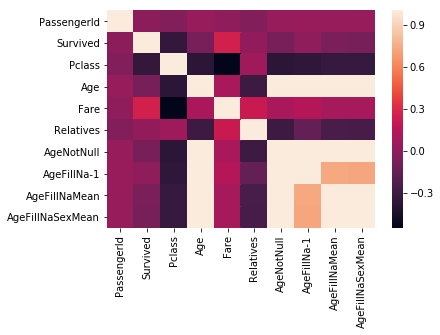

In [4]:
sns.heatmap(titanic_raw.corr())

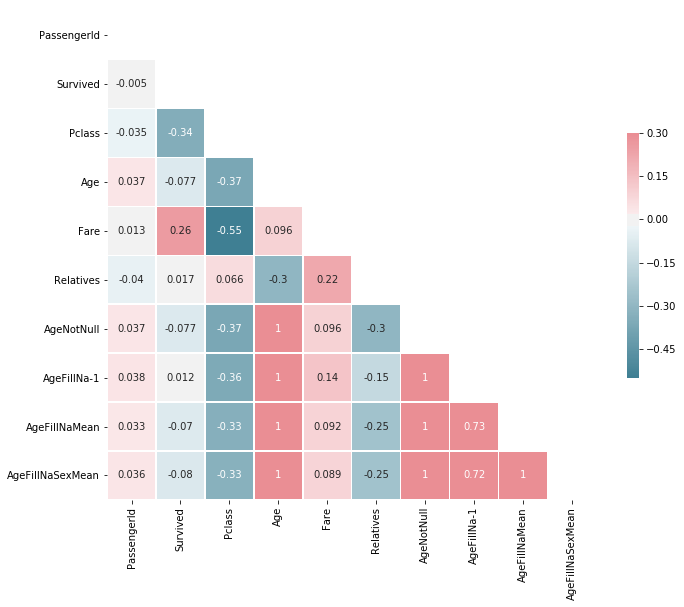

In [5]:
import matplotlib.pyplot as plt
import numpy as np

f, ax = plt.subplots(figsize=(11, 9))
corr = titanic_raw.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap,vmax=.3, center=0,
                 square=True, linewidths=.5, cbar_kws={"shrink": .5},
            annot=True)

In [6]:
titanic_raw.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'Relatives', 'AgeRange', 'AgeNotNull',
       'AgeFillNa-1', 'AgeFillNaMean', 'AgeFillNaSexMean', '_Faixa_Etaria',
       'Sobrenome', 'WomanName'],
      dtype='object')

In [7]:
titanic = titanic_raw[["Survived","Pclass","Sex",
                       "Fare","Embarked","AgeRange","Age"]]
titanic.head()

,Survived,Pclass,Sex,Fare,Embarked,AgeRange,Age
0,0,3,male,7.2500,S,adulto,22.0
1,1,1,female,71.2833,C,adulto,38.0
2,1,3,female,7.9250,S,adulto,26.0
3,1,1,female,53.1000,S,adulto,35.0
4,0,3,male,8.0500,S,adulto,35.0


## Passo 2.2 - Preparação/Manipulação

#### Nesse passo também é importante a gente dar uma olhada se as nossas HIPÓTESES fazem sentido

#### Vamos ver se quem tava nas primeiras classes teve mais chance de sobreviver

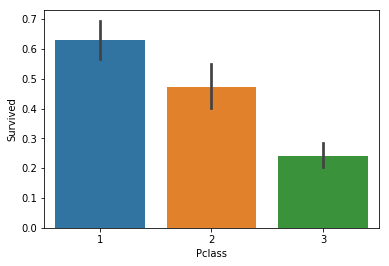

In [8]:
sns.barplot('Pclass', 'Survived', data=titanic)

#### Será que o local de embarque faz alguma diferença na sua chance de sobreviver?

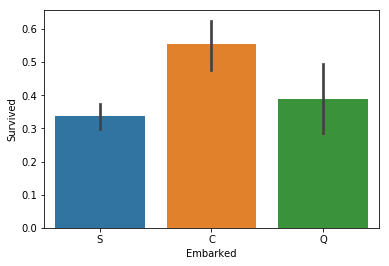

In [9]:
sns.barplot('Embarked', 'Survived', data=titanic)

#### Será que o "sexo" importa tanto assim?

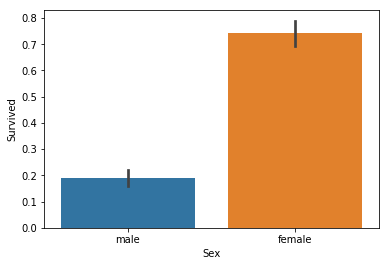

In [10]:
sns.barplot('Sex', 'Survived', data=titanic)

In [11]:
titanic.head()

,Survived,Pclass,Sex,Fare,Embarked,AgeRange,Age
0,0,3,male,7.2500,S,adulto,22.0
1,1,1,female,71.2833,C,adulto,38.0
2,1,3,female,7.9250,S,adulto,26.0
3,1,1,female,53.1000,S,adulto,35.0
4,0,3,male,8.0500,S,adulto,35.0


## <font color='blue'>Gere o gráfico de sobreviventes por faixa etária</font>
![alt text](https://static.vix.com/pt/sites/default/files/styles/large/public/a/atrasada-relogio-pulso-1116-1400x800.jpg?itok=qv3gUH6U)

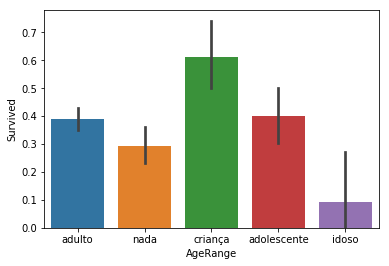

In [12]:
sns.barplot('AgeRange', 'Survived', data=titanic)

## <font color='blue'>Temos algum nulo, não tratado?</font>
![alt text](https://static.vix.com/pt/sites/default/files/styles/large/public/a/atrasada-relogio-pulso-1116-1400x800.jpg?itok=qv3gUH6U)

In [13]:
titanic.isnull().sum()

Survived      0
Pclass        0
Sex           0
Fare          0
Embarked      2
AgeRange      0
Age         177
dtype: int64

In [14]:
titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [15]:
titanic.is_copy = False  # o is copy é necessário para não gerar warning de modificacao de dataframe
titanic["EmbarkedFillnaMax"] = titanic["Embarked"].fillna("S")

In [16]:
titanic["AgefillnaMedian"] = titanic["Age"].fillna(
    titanic.Age.median()
)

In [17]:
titanic.isnull().sum()

Survived               0
Pclass                 0
Sex                    0
Fare                   0
Embarked               2
AgeRange               0
Age                  177
EmbarkedFillnaMax      0
AgefillnaMedian        0
dtype: int64

## Os algortimos de Machine Learning podem ter problemas com algo diferente de números

### Agora temos que transformar dados para categóricos binários

In [18]:
titanic['AgeRange'].head(10)

0         adulto
1         adulto
2         adulto
3         adulto
4         adulto
5           nada
6         adulto
7        criança
8         adulto
9    adolescente
Name: AgeRange, dtype: object

In [19]:
gender = pandas.get_dummies(titanic['AgeRange'])
gender.head(10)

,adolescente,adulto,criança,idoso,nada
0,0,1,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,1,0,0,0
5,0,0,0,0,1
6,0,1,0,0,0
7,0,0,1,0,0
8,0,1,0,0,0
9,1,0,0,0,0


#### Podemos apagar um colunas dos sexos pois os dados são complementares

In [20]:
gender = pandas.get_dummies(titanic['Sex'], drop_first=True)
gender.head()

,male
0,1
1,0
2,0
3,0
4,1


In [21]:
embark_location = pandas.get_dummies(
    titanic['EmbarkedFillnaMax'])
embark_location.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [22]:
age_range = pandas.get_dummies(titanic['AgeRange'])
age_range.head()

,adolescente,adulto,criança,idoso,nada
0,0,1,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,1,0,0,0


### Agora temos que juntar essas colunas que criamos com o dado original

In [23]:
titanic_concat = pandas.concat([titanic, gender, 
                             embark_location, 
                             age_range], axis=1)

### Eliminando colunas que foram transformadas em categorias binárias

In [24]:
titanic_dmy = titanic_concat.drop(["Embarked", 
                                "EmbarkedFillnaMax", 
                                "Sex", 
                                "AgeRange"], axis=1)
titanic_dmy.head()

,Survived,Pclass,Fare,Age,AgefillnaMedian,male,C,Q,S,adolescente,adulto,criança,idoso,nada
0,0,3,7.2500,22.0,22.0,1,0,0,1,0,1,0,0,0
1,1,1,71.2833,38.0,38.0,0,1,0,0,0,1,0,0,0
2,1,3,7.9250,26.0,26.0,0,0,0,1,0,1,0,0,0
3,1,1,53.1000,35.0,35.0,0,0,0,1,0,1,0,0,0
4,0,3,8.0500,35.0,35.0,1,0,0,1,0,1,0,0,0


In [25]:
titanic_dmy.isnull().sum()

Survived             0
Pclass               0
Fare                 0
Age                177
AgefillnaMedian      0
male                 0
C                    0
Q                    0
S                    0
adolescente          0
adulto               0
criança              0
idoso                0
nada                 0
dtype: int64

## Passo 3 - Geração do modelo

### Vamos usar apenas 2 colunas (features) para geração do nosso primeiro modelo

In [26]:
features = ["male", "Pclass"]
X = titanic_dmy[features]

y = titanic_dmy["Survived"]

Para treinarmos o nosso modelo precisamos separar ele em treino e teste.
- Treino, é aquele que será usado para gerar o nosso modelo
- Teste, nesse é que vamos validar se a nossa previsão foi correta

In [27]:
from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = \
    train_test_split(X, y, test_size = 0.3, random_state=25)

Separamos nosso dataset deixando 30% para o teste. Definimos um número randomico para sempre garantirmos q vamos manter o mesmos indivíduos no dataset de teste

## Gerar o modelo

In [28]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=42)
model = log_reg.fit(x_treino, y_treino)

### Agora que geramos o nosso modelo, vamos usá-lo!

In [29]:
predictions = model.predict(x_teste)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0])

# Passo 4 - Testar a qualidade do modelo

## Métricas de qualidade

### Matriz  de confusão

![tt](https://sebastianraschka.com/images/faq/multiclass-metric/conf_mat.png)

In [30]:
matriz_confusao = pandas.crosstab(y_teste, predictions) # confusion_matrix
matriz_confusao

col_0,0,1
Survived,,
0,140,25
1,36,67


In [31]:
from sklearn import metrics
metrics.accuracy_score(y_teste, predictions)

0.77238805970149249

O valor acima é dado por $ ACC = Corretas / Todas $ ou $(140 + 67) / (140 + 25 + 36 + 67)$

Olhando os resultados da matriz de confusão ele nos diz que 140 e 67 são os números corretos da predição.
34 e 29 são os números de predições erradas!

## Precision e recall

A partir da matriz de confusão algumas taxas podem ser calculadas.

Vamos visualizar de outra maneira os dados sendo testados:

![pr](https://upload.wikimedia.org/wikipedia/commons/thumb/a/ab/Precis%C3%A3o_e_revoca%C3%A7%C3%A3o.png/262px-Precis%C3%A3o_e_revoca%C3%A7%C3%A3o.png)

Dentro do círculo estão os elementos julgados como 1 (Positivo, nesse caso, sobreviveu).

Fora do círculo estão os elementos que a árvore classificou como 0 (Negativo, nesse caso, não-sobreviveu).

O retângulo representa o real valor dos dados.

### PRECISION

*Precision* representa quanto dos elementos julgados como Sobreviventes, de fato são Sobreviventes. 

Mede a taxa de acerto do classificador dentre os valores <span class="atencao">estimados</span> .

$P=\frac{TP}{TP+FP}$

### RECALL

*Recall* representa quantos dos reais sobreviventes foram de fato classificados como sobreviventes.

Mede a taxa de acerto do classificador dentre os valores <span class="atencao">reais</span> .

$R=\frac{TP}{TP+FN}$

### F1-SCORE

Podemos relacionar o *recall* e o *precision* em uma métrica!

$F1=2\frac{precision  \times  recall}{precision+recall}$

In [32]:
from sklearn import metrics

print(metrics.classification_report(y_teste, predictions))

             precision    recall  f1-score   support

          0       0.80      0.85      0.82       165
          1       0.73      0.65      0.69       103

avg / total       0.77      0.77      0.77       268



## <font color='blue'>Passo 5 - Melhore</font> <3 
## Sugestões

- Usamos nesse modelo apenas `[male, pclass]`... Use mais colunas
- Uma coluna para dizer se tava sozinho ou acompanhado (se tem família)
- Que tal criar uma feature artificial? Multiplicar a idade pela classe

![alt text](https://static.vix.com/pt/sites/default/files/styles/large/public/a/atrasada-relogio-pulso-1116-1400x800.jpg?itok=qv3gUH6U)

### Que tal a gente fazer um cara que descobre pra gente as melhores features

### Recursive feature elimination with cross-validation

In [33]:
from sklearn.feature_selection import RFECV
RFECV?

In [34]:
titanic_dmy.columns

Index(['Survived', 'Pclass', 'Fare', 'Age', 'AgefillnaMedian', 'male', 'C',
       'Q', 'S', 'adolescente', 'adulto', 'criança', 'idoso', 'nada'],
      dtype='object')

In [35]:
titanic_drop_na = titanic_dmy.drop("Age", axis=1)

In [36]:
from sklearn.feature_selection import RFECV
X = titanic_drop_na.drop(["Survived"], axis=1)
y = titanic_drop_na["Survived"]

# Veremos o que é CV a seguir
rfecv = RFECV(estimator=LogisticRegression(random_state=42), cv=10)
rfecv.fit(X, y)

RFECV(cv=10,
   estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
   n_jobs=1, scoring=None, step=1, verbose=0)

In [37]:
print("Número ótimo de features: %d" % rfecv.n_features_)
print('Melhor conjunto de features: %s' 
   % list(X.columns[rfecv.support_]))

Número ótimo de features: 11
Melhor conjunto de features: ['Pclass', 'AgefillnaMedian', 'male', 'C', 'Q', 'S', 'adolescente', 'adulto', 'criança', 'idoso', 'nada']


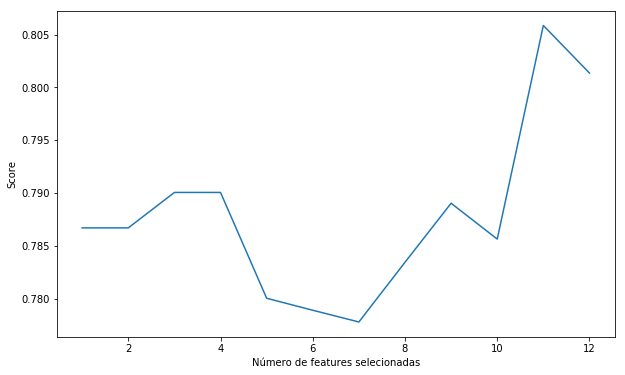

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.xlabel("Número de features selecionadas")
plt.ylabel("Score")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

## Cross Validation

Usamos antes um train-test split fixo, com 30% para dados de teste.

Outra técnica, a *Cross Validation*, ou validação cruzada, é muito usada para estimar a precisão de um modelo. 

A tecnica de *Cross Validation* pode ser usada também para otimização de parâmetros de um algoritmo. 

![cv](https://cdn-images-1.medium.com/max/1600/1*J2B_bcbd1-s1kpWOu_FZrg.png)

In [39]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(LogisticRegression(random_state=42),
                           X, y, cv=10)
mean_accuracy = sum(accuracy)/len(accuracy)

print("""Scores:{}
Mean:{}""".format(accuracy,mean_accuracy))

Scores:[ 0.8         0.77777778  0.79775281  0.85393258  0.78651685  0.79775281
  0.7752809   0.78651685  0.84269663  0.79545455]
Mean:0.801368176143457


-----------------------------------

# Submetendo nosso modelo ao Kaggle

<p class="importante"> https://www.kaggle.com/c/titanic </p>

Podemos ver que no kaggle o dataset desse desafio esta separado em treino e teste! O teste é o dataset que iremos estimar os resultados!

<span class="atencao">Para realizarmos as predições é importante realizar as etapas de pre-processamento no dataset de teste! </span>

Obs.: nesse caso será dado o dataset de teste já pre-processado

In [40]:
titanic_test = pandas.read_csv("test.csv")

titanic_test["male"] = pandas.get_dummies(titanic['Sex'], drop_first=True)

O dataset de teste tem que possuir as mesma colunas usadas no treinamento!

In [41]:
X = titanic_test[["male", "Pclass"]]

In [42]:
predictions = model.predict(X)
predictions

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1,

O documento de predição tem que seguir o modelo mostrado na página do desafio no Kaggle, ou seja, o Id do passageiro (`PassengerId`) e a predição.

Para isso precisamos inicialmente que o `predictions` seja uma Série

In [43]:
predictions_serie = pandas.Series(predictions)
predictions_serie.name = "Survived"

Em seguida devemos fazer o concat

In [44]:
result = pandas.concat([predictions_serie, titanic_test],axis=1)
result = result[["PassengerId","Survived"]]
result.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,1
3,895,1
4,896,0


In [45]:
result.to_csv("titanic_to_submit.csv",index=False)

Por fim, vamos baixar o arquivo `titanic_to_submit.csv` e submeter no Kaggle!

O Kaggle é uma ótima ferramenta para testar seus conhecimentos.